In [48]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect, func

In [49]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [50]:
import pandas as pd
from pandas import DataFrame
import sqlite3
import numpy as np


**Step 3 - Climate Analysis and Exploration**

In [51]:
# Create engine 
engine = create_engine("sqlite:///hawaii.sqlite",echo=False)

In [52]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [53]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [54]:
# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [55]:
Measurement = Base.classes.measurement
Station = Base.classes.station
conn = engine.connect()


In [56]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp INTEGER
tobs INTEGER


In [57]:
# Create a session
session = Session(engine)

In [58]:
inspector.get_table_names()

['measurement', 'station']

In [59]:
some_list=conn.execute("select date from measurement").fetchall()
last_date=some_list[-1]
print(last_date)

('2017-08-23',)


In [131]:
import datetime as dt
query_date = dt.date(2011, 4, 8) - dt.timedelta(days=15)

print("Start date: ", dt.date(2011, 4, 8) ," "," Finish Date: " , query_date )


Start date:  2011-04-08    Finish Date:  2011-03-24


**Precipitation Analysis**


In [249]:
results = session.query( Measurement.date, Measurement.prcp).\
     order_by(Measurement.date.desc()).all()
plot_data_df=pd.DataFrame(results)
#prcp_list=plot_df['prcp']
#plot_data_df.pop('date')
plot_df=plot_data_df.groupby(['date'])['prcp'].mean().reset_index().tail(365)
#graph_df_01=graph_df.reset_index()
#plot_org_df=plot_df.rename(columns={'prcpt':'Precipitation'}).tail(365)
plot=plot_df.rename(columns={"prcp":"Precipitation"})

#random_list=np.random.choice(date_list)
#graph_df_01=graph_df.reset_index()
date_list=plot['date']
prcp_list=plot['Precipitation']
random_list=np.random.choice(date_list,8)
random_list_sort=np.sort(random_list)[::-1]
plot.head()

,date,Precipitation
2427,2016-08-24,1.332857
2428,2016-08-25,0.077143
2429,2016-08-26,0.016667
2430,2016-08-27,0.053333
2431,2016-08-28,0.516667


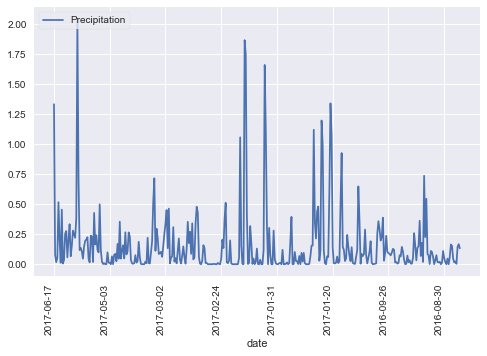

In [254]:
new_df=plot_df.plot(x=date_list,subplots=True)
#ax = fig.add_subplot(111)
#fig, ax = plt.subplots(111)
#ax.set_xticks(date)
xlabels=random_list_sort
plt.xticks(np.arange(0,365,50),xlabels, rotation = 'vertical')
plt.xlabel("date")
plt.legend(labels=['Precipitation'],loc='upper left',frameon=True)
plt.show()

**Temperature Analysis**
